In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import ROOT

Welcome to JupyROOT 6.26/06


In [2]:
DirPath = "./Data/2023/0727/test36/"
DataPath = DirPath + "10/ftdata2.csv"

df = pd.read_csv(DataPath, names=["freq", "amplitude"])

In [3]:
df_s = df.sort_values(by = "amplitude", ascending=False)
#df_r = df_s.reset_index(drop=True)
print(df_s[:10])

         freq  amplitude
0         0.0   2.242430
2510  18383.8   1.377470
2426  17768.6   0.855496
2509  18376.5   0.572826
2421  17731.9   0.479195
2417  17702.6   0.455354
2424  17753.9   0.454299
2418  17710.0   0.419490
2431  17805.2   0.400185
2700  19775.4   0.372184


In [4]:
df_s.amplitude[1]

0.0425062

In [5]:
df.amplitude[2512]

0.17032

In [6]:
gr = ROOT.TGraph(len(df.freq), np.array(df.freq), np.array(df.amplitude))
#gr_fitBG = ROOT.TF1("f1", "pol2+gaus", 17986., 19170.)
gr_fitBG = ROOT.TF1("f1", "[0]+[1]*x+[2]*x*x+[3]/((x-[4])*(x-[4])+[5]*[5])", 17926., 19170.)
gr_fitBG.SetParameters(-11., 0.0012, -3.4e-8, 17.6, 18381.3, 3.09)

In [77]:
PeakIndex = 2510
exclude_indices = [PeakIndex-1, PeakIndex, PeakIndex+1]

# フィッティングを実行（除外したいデータ点はRejectPointで除外）
for i in range(len(df.freq)):
    if i in exclude_indices:
        continue
        #gr_fitBG.RejectPoint(i)
    else:
        gr.SetPoint(i, df.freq[i], df.amplitude[i])

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


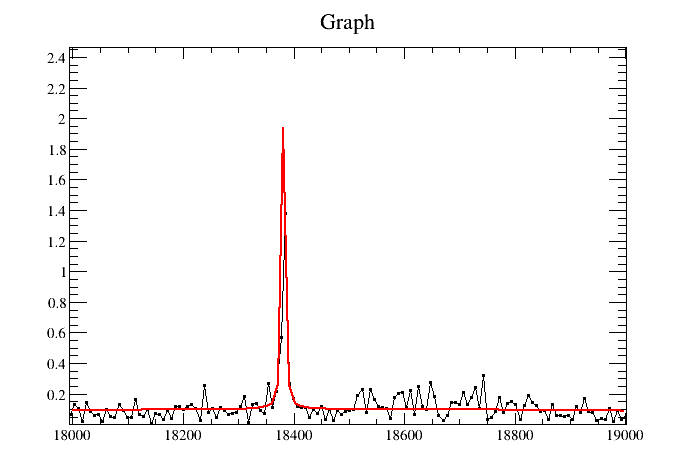

In [7]:
gr = ROOT.TGraph(len(df.freq), np.array(df.freq), np.array(df.amplitude))
#gr_fitBG.SetParameters(-162., 0.0175, -4.7e-3, 1.0, 18397.9, 5.0)
gr.Fit(gr_fitBG, "QR")
par = [gr_fitBG.GetParameter(k) for k in range(gr_fitBG.GetNpar())]
gr.Draw("APL")
gr.SetMarkerStyle(7)
gr.SetMarkerSize(10)
gr.GetXaxis().SetRangeUser(18000., 19000.)
#gr.GetYaxis().SetRangeUser(0., 2.1)
c1 = ROOT.gROOT.FindObject("c1")
c1.Draw("same")

In [79]:
for i in range(len(df.freq)):
    if df.freq[i]<18000.0 or df.freq[i]>19000.0:
        continue
    else:
        freq = df.freq[i]
        amp = df.amplitude[i]-(par[0]+par[1]*freq+par[2]*freq**2)
        if amp<0: amp = 0.0
        gr.SetPoint(i, freq, amp)

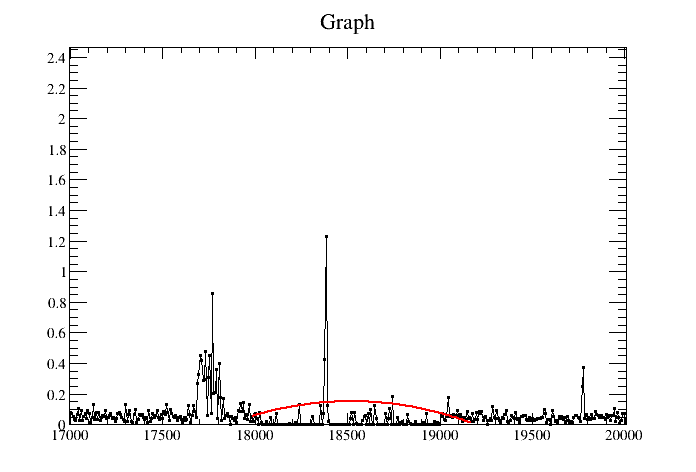

In [80]:
gr.Draw("APL")
gr.SetMarkerStyle(7)
gr.SetMarkerSize(10)
gr.GetXaxis().SetRangeUser(17000., 20000.)
c1 = ROOT.gROOT.FindObject("c1")
c1.Draw("same")

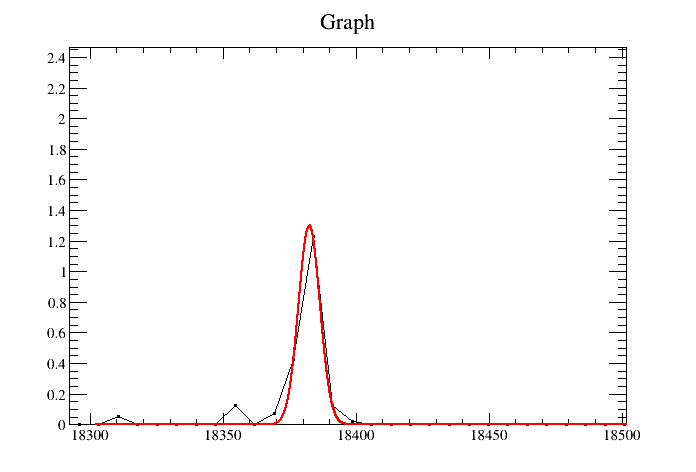

In [81]:
#gr_fit = ROOT.TF1("f", "[0]/(pow((x-[1]), 2)+pow([2], 2))", 18302.0, 18513.0)
#gr_fit.SetParameters(12.0, 18397.9, 2.0)
gr_fit = ROOT.TF1("f", "gaus", 18302.0, 18513.0)
gr_fit.SetParameters(1.0, 18397.9, 5.0)
gr_fit.SetNpx(10000)
gr.Fit(gr_fit, "QR")
par = [gr_fit.GetParameter(k) for k in range(gr_fit.GetNpar())]
gr.Draw("APL")
gr.SetMarkerStyle(7)
gr.SetMarkerSize(10)
gr.GetXaxis().SetRangeUser(18300., 18500.)
#gr.GetYaxis().SetRangeUser(0., 2.1)
c1 = ROOT.gROOT.FindObject("c1")
c1.Draw("same")

In [82]:
par

[1.3005531027034738, 18382.473533936783, 4.0182214818069415]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: pdf file ./Data/2023/0727/test150/PolGlow.pdf has been created


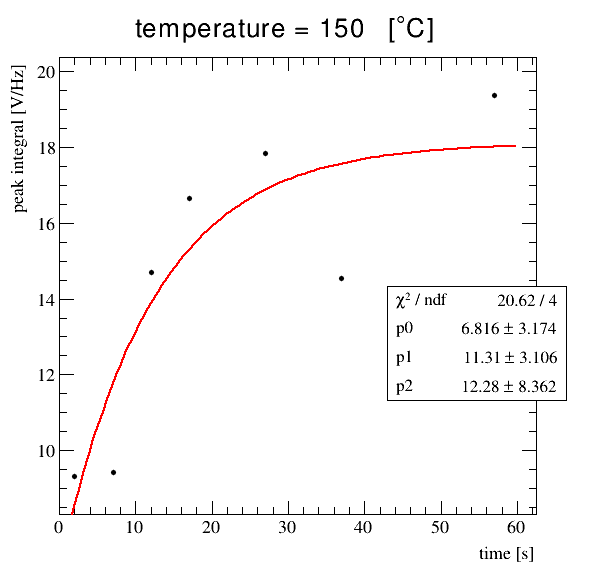

In [30]:
temp = 150
SavePath = "./Data/2023/0727/test" + str(temp) + "/"
Time = [2., 7., 12., 17., 27., 37., 57.]
PeakInt = pd.read_table(SavePath + "PeakInt.txt", names=["PeakInt"])

c2 = ROOT.TCanvas("c2", "c2", 600, 600)
gr_PolGlow = ROOT.TGraph(len(Time), np.array(Time), np.array(PeakInt))
gr_FitPolGlow = ROOT.TF1("f", "[0]+[1]*(1-exp(-x/[2]))", 0., 60.)
gr_FitPolGlow.SetParameters(10., 10., 15.)
gr_PolGlow.Fit(gr_FitPolGlow, "QR")
gr_PolGlow.SetMarkerStyle(20)
gr_PolGlow.SetMarkerSize(0.7)
gr_PolGlow.Draw("AP")
gr_PolGlow.SetTitle("\mathrm{temperature} = %d $[^\circ\mathrm{C}]$"%temp)
gr_PolGlow.GetXaxis().SetTitle("time [s]")
gr_PolGlow.GetYaxis().SetTitle("peak integral [V/Hz]")
ROOT.gStyle.SetOptFit(1)
stats = gr_PolGlow.GetListOfFunctions().FindObject("stats")
stats.SetX1NDC(0.65)  # X座標を調整
stats.SetY1NDC(0.3)   # Y座標を調整
stats.SetX2NDC(0.95)  # X座標を調整
stats.SetY2NDC(0.5)   # Y座標を調整
c2.Draw("same")
c2.SaveAs(SavePath + "PolGlow.pdf")